In [42]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [57]:
df = pd.read_csv('/content/drive/MyDrive/NLP DATA/liver_text_data.csv')
df.head()

,Unnamed: 0,link,text
0,0,https://www.netmeds.com/images/product-v1/600x...,Ademetionine Tablets 400 mg Adefresh-400 T-400...
1,1,https://www.netmeds.com/images/product-v1/600x...,Composition: MfgLic.No.110/UA/SC/P-2006&110/UA...
2,2,https://www.netmeds.com/images/product-v1/600x...,Marketednce ASCENTRA Di Ascentra 8/4Frnds Co...
3,3,https://www.netmeds.com/images/product-v1/600x...,SHNOWOE starta R0o Adenomnac 121% Manotactured...
4,4,https://www.netmeds.com/images/product-v1/600x...,Metadoxine Tablets ALCOLIV each uncoataotablet...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  91 non-null     int64 
 1   link        91 non-null     object
 2   text        91 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


In [59]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [60]:
# Define a function to perform NLP preprocessing on a sentence
def preprocess(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    
    # Convert all tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join the tokens back into a sentence
    preprocessed_sentence = ' '.join(tokens)
    
    return preprocessed_sentence

# Apply the preprocessing function to each sentence in the data frame
df['preprocessed_text'] = df['text'].apply(preprocess)

# Show the first 5 rows of the data frame
df.head()


,link,text,preprocessed_text
0,https://www.netmeds.com/images/product-v1/600x...,Ademetionine Tablets 400 mg Adefresh-400 T-400...,ademetionine tablets 400 mg adefresh-400 t-400...
1,https://www.netmeds.com/images/product-v1/600x...,Composition: MfgLic.No.110/UA/SC/P-2006&110/UA...,composition : mfglic.no.110/ua/sc/p-2006 & 110...
2,https://www.netmeds.com/images/product-v1/600x...,Marketednce ASCENTRA Di Ascentra 8/4Frnds Co...,marketednce ascentra di ascentra 8/4frnds coln...
3,https://www.netmeds.com/images/product-v1/600x...,SHNOWOE starta R0o Adenomnac 121% Manotactured...,shnowoe starta r0o adenomnac 121 % manotacture...
4,https://www.netmeds.com/images/product-v1/600x...,Metadoxine Tablets ALCOLIV each uncoataotablet...,metadoxine tablets alcoliv uncoataotablet cont...


In [61]:
sample_df = df.iloc[0:5 , ]
sample_df

,link,text,preprocessed_text
0,https://www.netmeds.com/images/product-v1/600x...,Ademetionine Tablets 400 mg Adefresh-400 T-400...,ademetionine tablets 400 mg adefresh-400 t-400...
1,https://www.netmeds.com/images/product-v1/600x...,Composition: MfgLic.No.110/UA/SC/P-2006&110/UA...,composition : mfglic.no.110/ua/sc/p-2006 & 110...
2,https://www.netmeds.com/images/product-v1/600x...,Marketednce ASCENTRA Di Ascentra 8/4Frnds Co...,marketednce ascentra di ascentra 8/4frnds coln...
3,https://www.netmeds.com/images/product-v1/600x...,SHNOWOE starta R0o Adenomnac 121% Manotactured...,shnowoe starta r0o adenomnac 121 % manotacture...
4,https://www.netmeds.com/images/product-v1/600x...,Metadoxine Tablets ALCOLIV each uncoataotablet...,metadoxine tablets alcoliv uncoataotablet cont...


In [50]:
sample_text = df.iloc[0:5 , 2].to_list()
sample_text

['ademetionine tablets 400 mg adefresh-400 t-400 1x10 tablets ascentra',
 'composition : mfglic.no.110/ua/sc/p-2006 & 110/ua/2006 enteric coated tablet contains batch . ademetionine 1.4 butane disulfonate ( sd4 eq.to ademetionine lon 400mg . mfg.date jfa excipients q.s . exp.date : colour : red oxide iron f m.r.p .. dosage : directed physician store cool & dry place per 10tablets 1 protect light . incl.of taxes keep medicine reach children caution : sold retail without prescription registered medical practitioner marketed indi ascentra manufactured : sufford laboratories pvt.ltd iso 9001:2015.14001:2015.ohsas 18001:2007 gmp ascentra 83/4 , friends colony.balluput 143.raipur ind.areabhagwanpurrooree , uk dehrad : n-248001uk email : ho.stafford2016 @ gmail.com',
 'marketednce ascentra di ascentra 8/4frnds colnupr ddun-2480k ademetionine tablets.400 mg adefresh400 composition : enteric coated tablet contains a-40 ademetionine 1.4 butane disulfonate ( sd4 eq ademetionine lon 400mg excipien

In [33]:
# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
# for i in range(0,len(sample_text)):
#     print(pos_tag(word_tokenize(sample_text[i])))
#     print('n')

[('Ademetionine', 'NNP'), ('Tablets', 'VBZ'), ('400', 'CD'), ('mg', 'JJ'), ('Adefresh-400', 'JJ'), ('T-400', 'JJ'), ('1x10', 'CD'), ('Tablets', 'NNS'), ('Ascentra', 'NNP')]
n
[('Composition', 'NN'), (':', ':'), ('MfgLic.No.110/UA/SC/P-2006', 'NNP'), ('&', 'CC'), ('110/UA/2006', 'CD'), ('Each', 'DT'), ('Enteric', 'NNP'), ('coated', 'VBD'), ('tablet', 'NN'), ('contains', 'NNS'), ('Batch', 'NNP'), ('No', 'NNP'), ('.', '.'), ('Ademetionine', 'VB'), ('1.4', 'CD'), ('butane', 'NN'), ('disulfonate', 'NN'), ('(', '('), ('SD4', 'NNP'), ('Eq.to', 'NNP'), ('Ademetionine', 'NNP'), ('lon', 'NN'), ('400mg', 'CD'), ('.', '.'), ('Mfg.Date', 'NNP'), ('Jfa', 'NNP'), ('Excipients', 'NNP'), ('q.s', 'NN'), ('.', '.'), ('Exp.Date', 'NN'), (':', ':'), ('Colour', 'NN'), (':', ':'), ('Red', 'JJ'), ('Oxide', 'NNP'), ('of', 'IN'), ('Iron', 'NNP'), ('f', 'NN'), ('M.R.P', 'NNP'), ('..', 'NNP'), ('Dosage', 'NN'), (':', ':'), ('As', 'IN'), ('directed', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Physician', 'JJ'), ('Stor


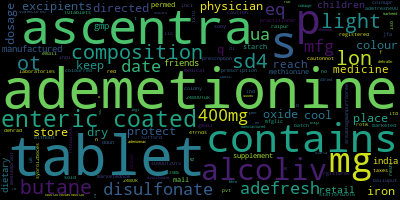

In [52]:
import plotly.express as px
from wordcloud import WordCloud

word_cloud_text = ' '.join(sample_text)

wordcloud = WordCloud().generate(word_cloud_text)

fig = px.imshow(wordcloud, color_continuous_scale='gray')
fig.show()

In [63]:
from nltk.tokenize import word_tokenize

# Tokenize the text data
sample_df['tokens'] = sample_df['preprocessed_text'].apply(word_tokenize)

# Create a new data frame that contains the frequency of each token in each document
token_frequency = pd.DataFrame(columns=['token', 'frequency'])

for index, row in sample_df.iterrows():
    for token in set(row['tokens']):
        token_frequency = token_frequency.append({
            'token': token,
            'frequency': row['tokens'].count(token)
        }, ignore_index=True)

# Group the data frame by token and sum the frequency across all documents
token_frequency = token_frequency.groupby('token').sum().reset_index()

# Show the first 5 rows of the token frequency data frame
token_frequency.head()

<ipython-input-63-69a506252fa9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,token,frequency
257,vanecureo,1
258,vilage,1
259,warningto,1
260,without,1
261,wor105c3hs,1


In [68]:
token_frequency.frequency.value_counts()

1     213
2      26
3      11
7       4
4       3
5       2
10      1
14      1
9       1
Name: frequency, dtype: int64

In [71]:
token_frequency.sort_values(by=['frequency'],ascending=False,inplace=True)

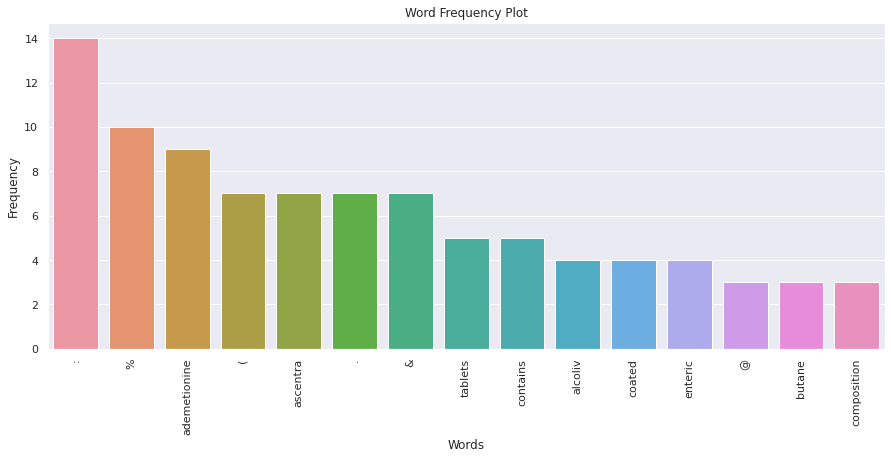

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x=token_frequency['token'][:15], y=token_frequency['frequency'][:15])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Plot")
plt.xticks(rotation=90)
plt.show()